<a href="https://colab.research.google.com/github/EugeneSoldatenko/Data-Science-learning/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашняя работа №2

1. Создайте различные модули для работы с данными, например: data_loader для загрузки данных из различных источников (CSV, JSON, API), data_processing.py - предобработка с различными проверками и т.д.
2. Создайте для вашего модуля методы для добавления и удаления различных типов визуализации, таких как гистограммы, линейные графики и диаграммы рассеяния. Реализуйте эти методы.
3. Создайте для вашего модуля метод для подсчета пустых или пропущенных значений в каждом столбце DataFrame, а также метод для вывода отчета с информацией о пропущенных значениях. Реализуйте метод заполнения пропущенных значений (например: средним, медианой или наиболее частым значением).
4. Датасет выбрать самостоятельно исходя из интересов
Выбраный датасет - digits — это изображения рукописных цифр (0–9), где каждый объект представлен как 64 признака (пиксели)


Данные загружены. Размер: (1797, 65)
Отчёт о пропущенных значениях:
Series([], dtype: int64)
Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



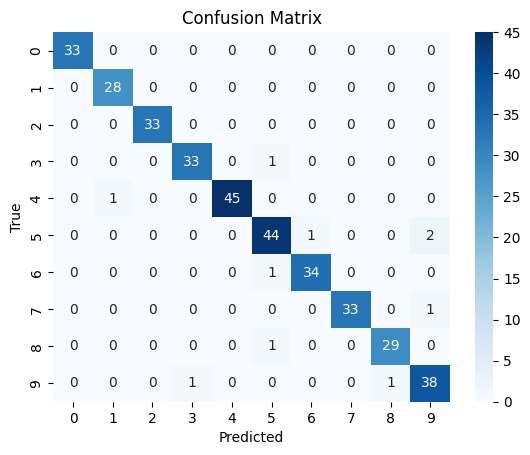

Прогноз: [6 9 3 7 2]
Истинные значения: [6 9 3 7 2]


In [2]:
# ================================
# load_data.py
# ================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

class DataLoader:
    def __init__(self):
        self.data = None
        self.visualizations = {}

    def load(self):
        dataset = load_digits(as_frame=True)
        df = dataset.frame
        df["target"] = dataset.target  # добавляем target
        self.data = df
        return self.data

    # ==== Методы для визуализаций ====
    def add_histogram(self, column):
        plt.hist(self.data[column], bins=20)
        plt.title(f"Histogram of {column}")
        plt.show()

    def add_line_plot(self, column):
        plt.plot(self.data[column])
        plt.title(f"Line plot of {column}")
        plt.show()

    def add_scatter(self, col_x, col_y):
        plt.scatter(self.data[col_x], self.data[col_y])
        plt.title(f"Scatter: {col_x} vs {col_y}")
        plt.show()

    # ==== Методы работы с пропусками ====
    def count_missing(self):
        return self.data.isnull().sum()

    def missing_report(self):
        missing = self.count_missing()
        print("Отчёт о пропущенных значениях:")
        print(missing[missing > 0])

    def fill_missing(self, strategy="mean"):
        for col in self.data.columns:
            if self.data[col].isnull().sum() > 0:
                if strategy == "mean":
                    self.data[col].fillna(self.data[col].mean(), inplace=True)
                elif strategy == "median":
                    self.data[col].fillna(self.data[col].median(), inplace=True)
                elif strategy == "mode":
                    self.data[col].fillna(self.data[col].mode()[0], inplace=True)
        return self.data


# ================================
# preprocess_data.py
# ================================
from sklearn.preprocessing import StandardScaler

class Preprocessor:
    def __init__(self, data):
        self.data = data.copy()
        self.scaler = None

    def scale(self):
        self.scaler = StandardScaler()
        features = self.data.drop("target", axis=1)
        scaled = self.scaler.fit_transform(features)
        self.data.loc[:, features.columns] = scaled
        return self.data

    # ==== Методы для пропусков ====
    def count_missing(self):
        return self.data.isnull().sum()

    def missing_report(self):
        missing = self.count_missing()
        print("Отчёт о пропущенных значениях (preprocessed):")
        print(missing[missing > 0])

    def fill_missing(self, strategy="mean"):
        for col in self.data.columns:
            if self.data[col].isnull().sum() > 0:
                if strategy == "mean":
                    self.data[col].fillna(self.data[col].mean(), inplace=True)
                elif strategy == "median":
                    self.data[col].fillna(self.data[col].median(), inplace=True)
                elif strategy == "mode":
                    self.data[col].fillna(self.data[col].mode()[0], inplace=True)
        return self.data


# ================================
# train_model.py
# ================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

class Trainer:
    def __init__(self, data):
        self.data = data
        self.model = None
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None

    def split_data(self, test_size=0.2, random_state=42):
        X = self.data.drop("target", axis=1)
        y = self.data["target"]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        return self.X_train, self.X_test, self.y_train, self.y_test

    def train(self):
        self.model = LogisticRegression(max_iter=1000)
        self.model.fit(self.X_train, self.y_train)
        return self.model


# ================================
# predict.py
# ================================
class Predictor:
    def __init__(self, model):
        self.model = model

    def predict(self, X_new):
        return self.model.predict(X_new)


# ================================
# evaluate_model.py
# ================================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

class Evaluator:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def evaluate(self):
        y_pred = self.model.predict(self.X_test)
        acc = accuracy_score(self.y_test, y_pred)
        print("Accuracy:", acc)
        print("\nClassification Report:\n", classification_report(self.y_test, y_pred))
        return acc

    def plot_confusion_matrix(self):
        y_pred = self.model.predict(self.X_test)
        cm = confusion_matrix(self.y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()


# ================================
# main.py (рабочий процесс)
# ================================
# Загружаем данные
loader = DataLoader()
data = loader.load()
print("Данные загружены. Размер:", data.shape)

# Проверка на пропуски
loader.missing_report()

# Предобработка
prep = Preprocessor(data)
data_preprocessed = prep.scale()

# Разделение и обучение
trainer = Trainer(data_preprocessed)
X_train, X_test, y_train, y_test = trainer.split_data()
model = trainer.train()

# Оценка
evaluator = Evaluator(model, X_test, y_test)
evaluator.evaluate()
evaluator.plot_confusion_matrix()

# Пример предсказания
predictor = Predictor(model)
sample = X_test.iloc[:5]
print("Прогноз:", predictor.predict(sample))
print("Истинные значения:", y_test.iloc[:5].values)
